In [1]:
import numpy as np
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2024-04-23 10:09:28.283789: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 10:09:28.283850: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 10:09:28.285340: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
def preprocess_images(X, image_shape):
    pixel_values = X.values.astype('float32')
        
    # Normalize pixel values
    pixel_values /= 255.0
    
    # Reshape pixel values
    num_images = pixel_values.shape[0]
    processed_images = pixel_values.reshape(num_images, *image_shape)
    
    return processed_images

In [3]:
train_file = '/kaggle/input/digit-recognizer/train.csv'
df = pd.read_csv(train_file)
X = df.drop('label', axis=1)
Y = df['label']

image_shape = (28, 28, 1)
preprocessed_X = preprocess_images(X, image_shape)

In [4]:
X_train, X_val, y_train, y_val = train_test_split(preprocessed_X, Y, test_size=0.2, random_state=42)

In [5]:
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

input_shape = (28, 28, 1)
num_classes = 10  # Number of output classes (digits 0-9)

model = create_cnn_model(input_shape, num_classes)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/20


2024-04-23 10:09:37.600237: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.35363, expected 1.53764
2024-04-23 10:09:37.600307: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.82107, expected 1.00508
2024-04-23 10:09:37.600332: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.81936, expected 1.00338
2024-04-23 10:09:37.600343: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.23827, expected 1.42229
2024-04-23 10:09:37.600352: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.05481, expected 2.23883
2024-04-23 10:09:37.600362: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.58554, expected 1.76955
2024-04-23 10:09:37.600373: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 3.00002, expected 2.18403
2024-04-23 10:09:37.600383: E external/local_xla/xla/se

  67/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4623 - loss: 1.6399

I0000 00:00:1713866979.306647    1704 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8647 - loss: 0.4341

2024-04-23 10:09:42.908957: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.34972, expected 1.00161
2024-04-23 10:09:42.909018: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.6774, expected 1.32929
2024-04-23 10:09:42.909028: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.95868, expected 1.61057
2024-04-23 10:09:42.909036: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.69333, expected 1.34521
2024-04-23 10:09:42.909044: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.08558, expected 1.73747
2024-04-23 10:09:42.909051: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 1.59326, expected 1.24515
2024-04-23 10:09:42.909059: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 1.72639, expected 1.37827
2024-04-23 10:09:42.909067: E external/local_xla/xla/ser

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8647 - loss: 0.4338 - val_accuracy: 0.9799 - val_loss: 0.0676
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9786 - loss: 0.0637 - val_accuracy: 0.9840 - val_loss: 0.0518
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9875 - loss: 0.0396 - val_accuracy: 0.9843 - val_loss: 0.0514
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9919 - loss: 0.0263 - val_accuracy: 0.9858 - val_loss: 0.0448
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9946 - loss: 0.0196 - val_accuracy: 0.9877 - val_loss: 0.0376
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9952 - loss: 0.0173 - val_accuracy: 0.9876 - val_loss: 0.0400
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9944 - loss: 0.0147 - val_accuracy: 0.9865 - val_loss: 0.0386
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9967 - loss: 0.0109 - val_accurac

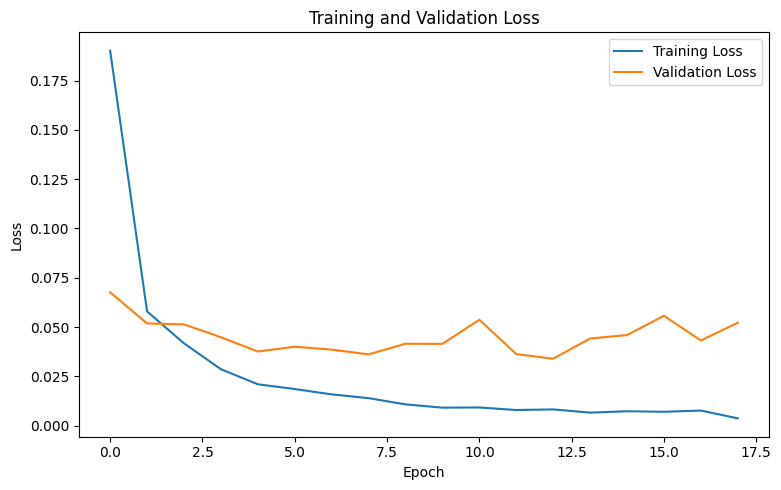

In [8]:
# Plot training and validation loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

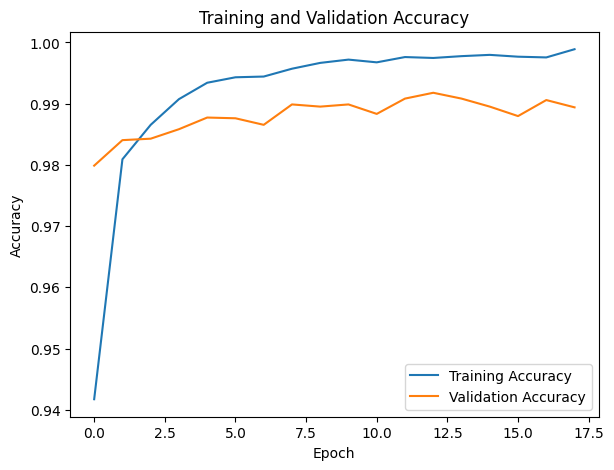

In [9]:
# Plot training and validation accuracy
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate the model on the validation data
val_predictions = model.predict(X_val)
val_predicted_classes = np.argmax(val_predictions, axis=1)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, val_predicted_classes)
print("Validation Accuracy:", val_accuracy)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Validation Accuracy: 0.9917857142857143


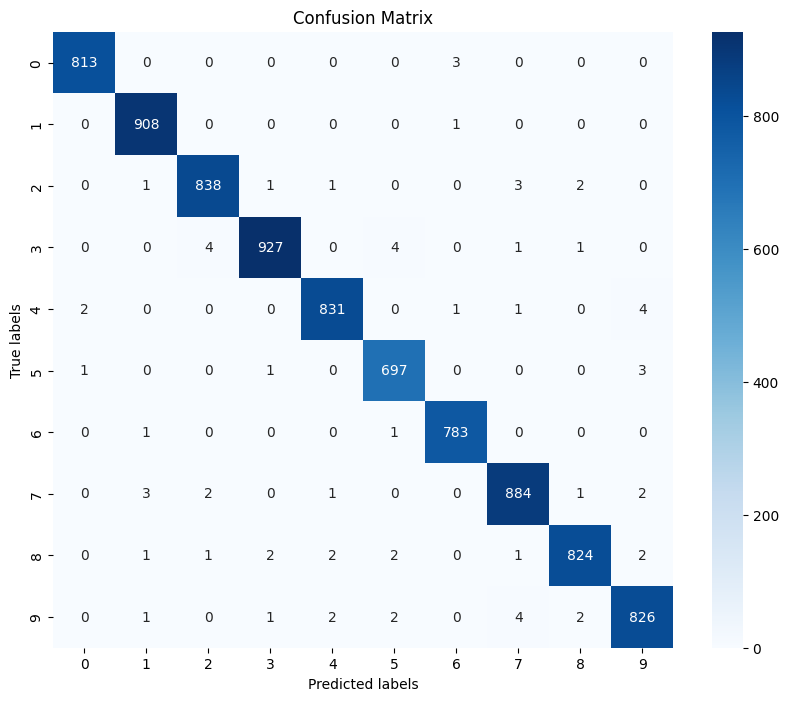

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, val_predicted_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Load test data
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
X_test = preprocess_images(test_data, image_shape)

In [13]:
# Predict the labels
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Create submission DataFrame
submission = pd.DataFrame({
    "ImageId": range(1, len(predicted_classes) + 1),
    "Label": predicted_classes
})

# Save submission file
submission.to_csv('submission.csv', index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
